<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    # Creating a subplot
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.2, subplot_titles=(f"{stock} Stock Price", f"{stock} Revenue"), 
                        row_width=[0.2, 0.7])

    # Adding stock price data to the plot
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Stock Price"), row=1, col=1)

    # Adding revenue data to the plot
    fig.add_trace(go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)

    # Updating layout
    fig.update_layout(showlegend=False, title_text=f"{stock} Stock Price vs Revenue")

    # Showing the plot
    fig.show()


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker("TSLA")

hist = tesla.history(period="max")

print(hist.head())



                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [8]:
# Using the history method to extract stock information and set the period to 'max'
tesla_data = tesla.history(period="max")

# Display the first five rows of the dataframe
print(tesla_data.head())



                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

Parse the html data using `beautiful_soup`.


In [11]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find('table', class_='table')

revenue_data = table.find_all('tr')[1].find_all('td')[1].text.strip()

print("Tesla Revenue:", revenue_data)

Tesla Revenue: $53,823


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [14]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tables = pd.read_html(url)

tesla_revenue = tables[1]

tesla_revenue.columns = ['Date', 'Revenue']
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Execute the following lines to remove an null or empty strings in the Revenue column.


In [16]:
tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])
tesla_revenue = tesla_revenue.reset_index(drop=True)
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [17]:
print(tesla_revenue.tail(5))


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-09-30     46.0
52  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
import yfinance as yf

# Create a ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Retrieve historical stock data (e.g., daily data for the past 5 years)
gme_data = gme_ticker.history(period="5y")

# Display the retrieved data (optional)
print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2018-12-31  2.981347  3.063558  2.976511  3.051468  11161200        0.0   
2019-01-02  3.010363  3.186874  3.003109  3.160276   8496800        0.0   
2019-01-03  3.138515  3.206218  3.068394  3.136097   7001600        0.0   
2019-01-04  3.392401  3.697064  3.312608  3.684974  47662800        0.0   
2019-01-07  3.653540  3.822798  3.612435  3.743005  18872000        0.0   

            Stock Splits  
Date                      
2018-12-31           0.0  
2019-01-02           0.0  
2019-01-03           0.0  
2019-01-04           0.0  
2019-01-07           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [19]:
import yfinance as yf
import pandas as pd

gme_ticker = yf.Ticker("GME")

gme_data = gme_ticker.history(period="max")

print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
# Reset the index of the gme_data DataFrame in place
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame using the head function
print(gme_data.head(5))


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [21]:
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

# Now, html_data contains the HTML content of the webpage


Parse the html data using `beautiful_soup`.


In [24]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)
    html_data = None  # Set html_data to None in case of failure

# Parse the HTML data using BeautifulSoup if it was successfully retrieved
if html_data:
    soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop (GME) Revenue data using the provided code
table = soup.find_all("tbody")[1]

# Extract the table data into a list of lists
table_data = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip().replace(',', '').replace('$', '')  # Remove commas and dollar signs
    table_data.append([date, revenue])

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(table_data, columns=['Date', 'Revenue'])

# Display the first few rows of the DataFrame
print(gme_revenue.head())



         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
# Display the last five rows of the gme_revenue DataFrame using the tail function
print(gme_revenue.tail(5))


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


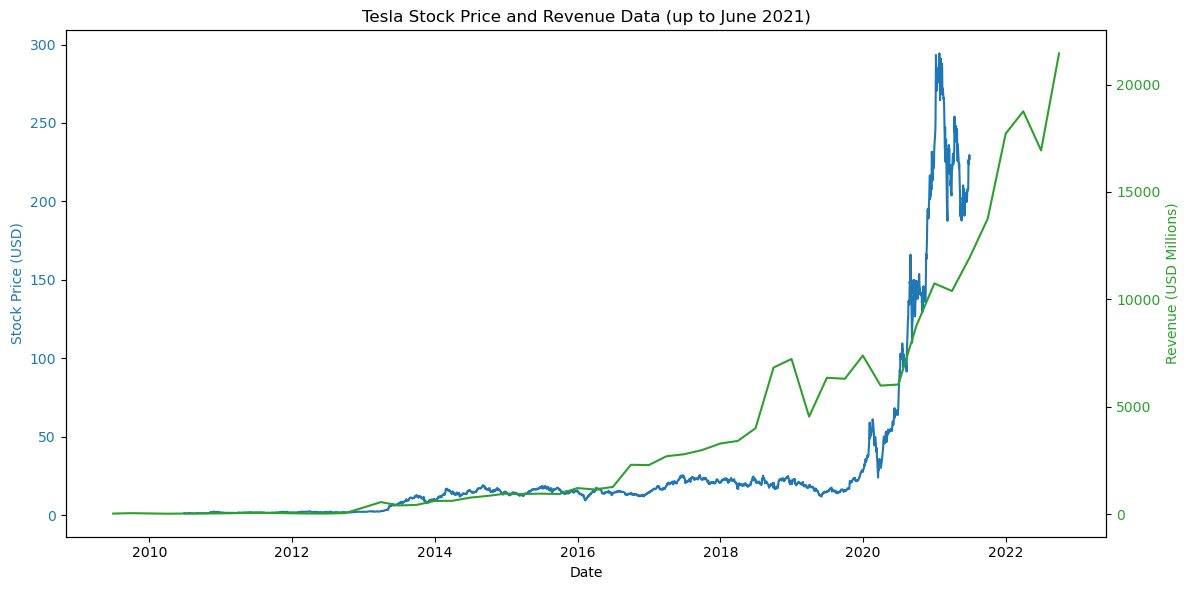

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch Tesla stock data up to June 2021
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(start="2010-06-29", end="2021-06-30")
tesla_data.reset_index(inplace=True)

# Fetching Tesla revenue data from the provided webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(url)

# Extracting the Tesla revenue table and cleaning data
tesla_revenue = tables[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue = tesla_revenue.sort_values(by='Date')

# Function to create a graph for stock data and revenue data
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the stock data
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a second y-axis for the revenue data
    ax2 = ax1.twinx()  
    color = 'tab:green'
    ax2.set_ylabel('Revenue (USD Millions)', color=color)  
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Final plot adjustments
    plt.title(title)
    fig.tight_layout()
    plt.show()

# Create and display the graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price and Revenue Data (up to June 2021)')




## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


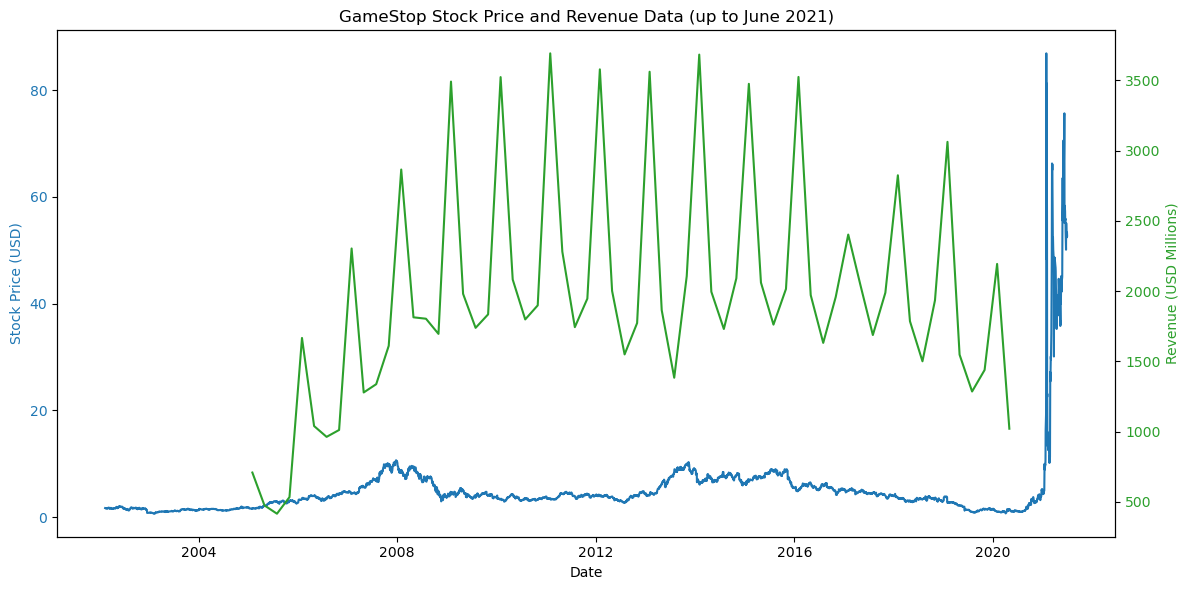

In [34]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Fetch GameStop stock data up to June 2021
gme = yf.Ticker("GME")
gme_data = gme.history(start="2002-02-13", end="2021-06-30")
gme_data.reset_index(inplace=True)

# Scrape GameStop Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]

# Extract the table data into a list of lists
table_data = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip().replace(',', '').replace('$', '')  # Remove commas and dollar signs
    table_data.append([date, revenue])

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(table_data, columns=['Date', 'Revenue'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue = gme_revenue.dropna(subset=['Revenue'])
gme_revenue = gme_revenue.sort_values(by='Date')

# Function to create a graph for stock data and revenue data
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the stock data
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Creating a second y-axis for the revenue data
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Revenue (USD Millions)', color='tab:green')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# Create and display the graph
make_graph(gme_data, gme_revenue, 'GameStop Stock Price and Revenue Data (up to June 2021)')



<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
